<a href="https://colab.research.google.com/github/nina-prog/DataAnalysis_VAE/blob/main/VAE_v1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.utils.vis_utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Data Preprocessing

---



## Load Data

In [18]:
### Load ecg5000 data using read_csv
ecg5000 = pd.read_csv('ECG5000_ALL.txt', sep='\s+', header=None)

### Delete label-column first (column 0)
ecg5000.drop(ecg5000.columns[[0]], axis=1, inplace=True)

In [19]:
### Optional test and info about data set
print("Type of ecg5000: \t \t {}".format(type(ecg5000)))
print("Dimensions of ecg5000: \t \t {}".format(ecg5000.shape))
print("Number of elements of ecg5000: \t {}".format((ecg5000.size)))
print("Display first 10 rows of ecg5000: \n {}".format(ecg5000.head(10)))

Type of ecg5000: 	 	 <class 'pandas.core.frame.DataFrame'>
Dimensions of ecg5000: 	 	 (5000, 140)
Number of elements of ecg5000: 	 700000
Display first 10 rows of ecg5000: 
         1         2         3    ...       138       139       140
0 -0.112522 -2.827204 -3.773897  ...  0.123431  0.925286  0.193137
1 -1.100878 -3.996840 -4.285843  ...  0.773820  1.119621 -1.436250
2 -0.567088 -2.593450 -3.874230  ...  0.321097  0.904227 -0.421797
3  0.490473 -1.914407 -3.616364  ...  1.086798  1.403011 -0.383564
4  0.800232 -0.874252 -2.384761  ...  0.971020  1.614392  1.421456
5 -1.507674 -3.574550 -4.478011  ...  1.634990  1.493366 -0.783134
6 -0.297161 -2.766635 -4.102185  ...  1.110407  1.288165 -0.823386
7  0.446769 -1.507397 -3.187468  ...  1.258433  0.961215 -0.999476
8  0.087631 -1.753490 -3.304473  ...  0.192971 -0.648683 -2.441068
9 -0.832281 -1.700368 -2.257301  ...  2.126852  1.679299  0.965814

[10 rows x 140 columns]


## Scale Data

In [ ]:
### Normalize dataframe with min-max-normalization to range between [-0.8, 0.8]
# (1) For any [a, b] normalization use: x = (b-a)((x-min)/(max-min))+ a
scaled_ecg5000 = (0.8 + 0.8)*(ecg5000 - ecg5000.min())/(ecg5000.max() - ecg5000.min())-0.8
print(normalized_ecg5000)

In [20]:
# Or (2) Use sklearn MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(-0.8,0.8))
scaled_ecg5000 = pd.DataFrame(min_max_scaler.fit_transform(ecg5000))
print(scaled_ecg5000)

           0         1         2    ...       137       138       139
0     0.105202 -0.154680 -0.521072  ...  0.190712  0.256566 -0.054755
1    -0.030005 -0.331729 -0.626180  ...  0.305374  0.286734 -0.247949
2     0.043017 -0.119297 -0.541672  ...  0.225560  0.253297 -0.127667
3     0.187692 -0.016509 -0.488729  ...  0.360551  0.330726 -0.123133
4     0.230067  0.140940 -0.235867  ...  0.340140  0.363540  0.090885
...        ...       ...       ...  ...       ...       ...       ...
4995 -0.033027 -0.067751 -0.335005  ... -0.337752 -0.198844 -0.292066
4996  0.045669 -0.012746 -0.329288  ...  0.391322  0.291519  0.017785
4997 -0.064328 -0.061103 -0.263680  ... -0.229486 -0.132008 -0.158819
4998 -0.033227 -0.015091 -0.196437  ...  0.090797  0.026031 -0.064782
4999  0.220296  0.302430  0.103076  ...  0.440269  0.378969  0.077596

[5000 rows x 140 columns]


## Split Data

In [21]:
### Split Data into 80/20 Training, Test
trainDF, testDF = train_test_split(scaled_ecg5000, test_size=0.2)
# Optional test and info about new data sets
print("Shape of Training DataFrame: \t {}".format(trainDF.shape))
print("Shape of Test DataFrame: \t {}".format(testDF.shape))

Shape of Training DataFrame: 	 (4000, 140)
Shape of Test DataFrame: 	 (1000, 140)


## Reshape Data

In [ ]:
# (1) 1D Array
### Flatten Values to 1D NP Array
x_train = trainDF.values.flatten()
x_test = testDF.values.flatten()

### Reshape input into [samples, timesteps, features]
n_train = len(x_train)
n_test = len(x_test)
x_train = x_train.reshape((1, n_train, 1)) # samples 1+, time steps n_train (4000*140), features 1  
x_test = x_test.reshape((1, n_test, 1)) # samples 1+, time steps n_test (1000*140), features 1

### Properties
print("Time steps of reshaped train dataset: {}".format(n_train))
print("Time steps of reshaped test dataset: {}".format(n_test))

In [26]:
# Or (2) Leave Dataframe Dimesions as they are
### Convert to array
x_train = trainDF.to_numpy()
x_test = testDF.to_numpy()

### Reshape input into [samples, timesteps, features]
n_train = len(trainDF.columns) # time steps
n_test = len(testDF.columns) # time steps
f_train = len(trainDF.index) # features
f_test = len(testDF.index) # features
x_train = x_train.reshape(f_train, n_train, 1)
x_test = x_test.reshape(f_test, n_test, 1)

### Properties
print("Time steps of reshaped train dataset: {}".format(n_train))
print("Time steps of reshaped test dataset: {}".format(n_test))
print(x_train.shape)
print(x_test.shape)

Time steps of reshaped train dataset: 140
Time steps of reshaped test dataset: 140
(4000, 140, 1)
(1000, 140, 1)


# Build Autoencoder (AE)

---



Model: "functional_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (InputLayer)     [(None, 140, 1)]          0         
_________________________________________________________________
Encode_1 (LSTM)              (None, 140)               79520     
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 705       
_________________________________________________________________
dense_14 (Dense)             (None, 140)               840       
_________________________________________________________________
reshape_2 (Reshape)          (None, 140, 1)            0         
_________________________________________________________________
Decode_1 (LSTM)              (None, 140, 140)          79520     
_________________________________________________________________
Output_Layer (TimeDistribute (None, 140, 1)          

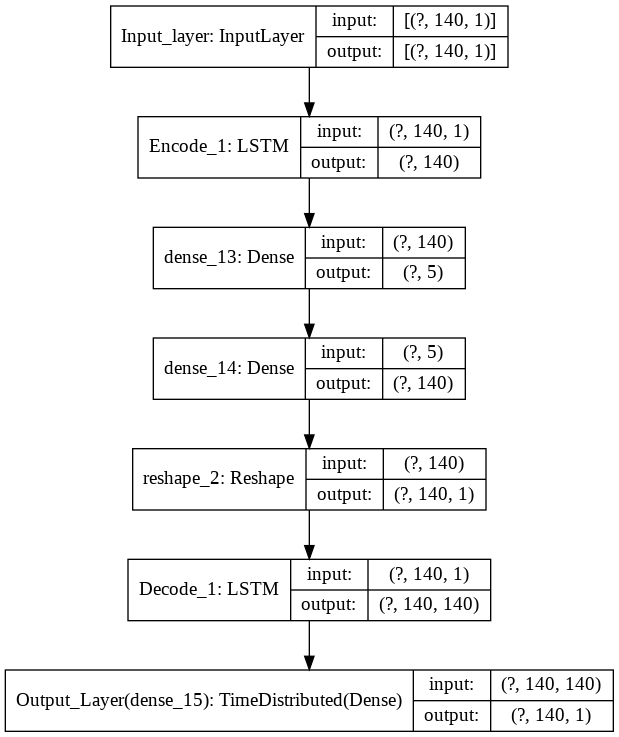

In [37]:
### For better understanding visit: https://towardsdatascience.com/autoencoders-for-the-compression-of-stock-market-data-28e8c1a2da3e
### For better understanding of layers and Recreating auto encoders visit: https://machinelearningmastery.com/lstm-autoencoders/
### or for code: https://gist.github.com/GerardBCN/40349b39bc45d4550141aff6966d1619#file-stock_price_autoencoding-ipynb
### For Reshaping Issues: https://machinelearningmastery.com/reshape-input-data-long-short-term-memory-networks-keras/

### fit model
encoding_dim = 140
epochs = 50

### define model
#bidirectional lstm
inputs = keras.Input(shape=(140, 1), name='Input_layer')
encoded = layers.LSTM(encoding_dim, activation='tanh', name='Encode_1')(inputs)
encoded = layers.Dense(5, activation='tanh')(encoded)
#here m,sigma (VAE)
#from now on decoder
encoded = layers.Dense(140, activation='tanh')(encoded)
encoded = layers.Reshape((140,1))(encoded)
#decoded = layers.RepeatVector(1, name='Bootleneck')(encoded)
#decoded = layers.Dense(5, activation='tanh')
decoded = layers.LSTM(encoding_dim, return_sequences=True, activation='tanh', name='Decode_1')(encoded)
decoded = TimeDistributed(Dense(1, activation='tanh', name=''),name='Output_Layer')(decoded)

sequence_autoencoder = keras.Model(inputs, decoded)
encoder = keras.Model(inputs, encoded)
#decoder = keras.Model()

sequence_autoencoder.summary()

### train AE
#change loss for VAE
sequence_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
history = sequence_autoencoder.fit(x_train, x_train,
                epochs=epochs,
                batch_size=32,
                shuffle=True,
                validation_data=(x_test, x_test))

### recreation
decoded_ecg5000 = sequence_autoencoder.predict(x_train)
plot_model(sequence_autoencoder, show_shapes=True, to_file='reconstruct_lstm_autoencoder.png')

# Plot Results

---



(4000, 140, 1)
(4000, 140, 1)
[[[ 1.33040169e-01]
  [-8.20177379e-02]
  [-5.02204678e-01]
  ...
  [ 4.39496821e-01]
  [ 4.39479299e-01]
  [ 2.63243504e-02]]

 [[ 1.42625622e-01]
  [ 6.01513474e-02]
  [-4.80113299e-01]
  ...
  [ 2.15766259e-01]
  [ 1.34821767e-01]
  [-2.28376084e-01]]

 [[ 9.53900702e-02]
  [ 1.84197630e-01]
  [ 6.05103010e-02]
  ...
  [-5.16673590e-01]
  [-3.01009366e-01]
  [-3.50690211e-01]]

 ...

 [[ 6.65489224e-03]
  [-1.34537645e-01]
  [-4.12737278e-01]
  ...
  [-8.03522094e-02]
  [ 2.26738456e-02]
  [-1.88010157e-01]]

 [[ 2.00612432e-01]
  [ 2.55787689e-01]
  [ 8.31790065e-02]
  ...
  [-2.81230124e-01]
  [-2.73160187e-01]
  [-3.47717455e-01]]

 [[ 1.40486682e-03]
  [-1.92156013e-01]
  [-4.61644098e-01]
  ...
  [-2.87226927e-02]
  [ 4.04319218e-04]
  [-3.50534033e-01]]]
[[[ 0.04910532]
  [ 0.01870483]
  [-0.03109411]
  ...
  [-0.12096962]
  [-0.16262124]
  [-0.24673712]]

 [[ 0.04911329]
  [ 0.01870526]
  [-0.03110472]
  ...
  [-0.12095414]
  [-0.16259637]
  [-0.

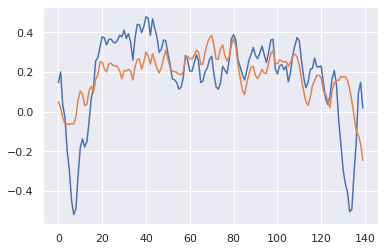

In [44]:
# Test if Input fits Dim of Output
print(x_train.shape)
print(decoded_ecg5000.shape)

print(x_train)
print(decoded_ecg5000)

# covert to 2D DataFrame and only show column 0
new_x_train= x_train.reshape(-1,140)
#new_x_train = pd.DataFrame(new_x_train)
#new_x_train = new_x_train.iloc[:, 0:1]
#print(new_x_train.head(10))

new_decoded_ecg5000 = decoded_ecg5000.reshape(-1,140)
#new_decoded_ecg5000 = pd.DataFrame(new_decoded_ecg5000)
#new_decoded_ecg5000 = new_decoded_ecg5000.iloc[:, 0:1]
#print(new_decoded_ecg5000.head(10))

# plot result
#ax = new_x_train[0].plot()
#new_decoded_ecg5000[0].plot(ax=ax, linewidth = 1, figsize=(25,6), title='Autoencoder Result')


#indize = sample
plt.figure()
plt.plot(new_x_train[3])
plt.plot(new_decoded_ecg5000[3])
plt.show() 